# Optimal Execution of Trades in the FX Market

In [2]:
from optexec import dataloader, execution, misc

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

In [3]:
T = 200
W = np.ones(shape = 5, dtype = int) * 500

## TWAP

In [10]:
file1 = 'data/ask.tsv'
file2 = 'data/bid.tsv'
orderbook_bid = dataloader.OnlineData(file2)
orderbook_ask = dataloader.OnlineData(file1)

ACPR = []

T = 200
W = np.array([5000, 2000, 3000]) 
start = 5
num = T - (start - 1)

ELL = np.linspace(start = start, stop = T, num = num, endpoint = True, dtype = int)

for L in tqdm(ELL):

    orderbook_bid = dataloader.OnlineData(file2)
    orderbook_ask = dataloader.OnlineData(file1)
    twap = execution.TWAP(T, L , W)
    ACPR_twap = twap.cumulative_impact(orderbook_bid=orderbook_bid, orderbook_ask=orderbook_ask)*100
    orderbook_ask.close()
    orderbook_bid.close()
    ACPR.append(ACPR_twap)

ACPR_TWAP = np.array(ACPR) 

100%|██████████| 196/196 [00:03<00:00, 54.98it/s]


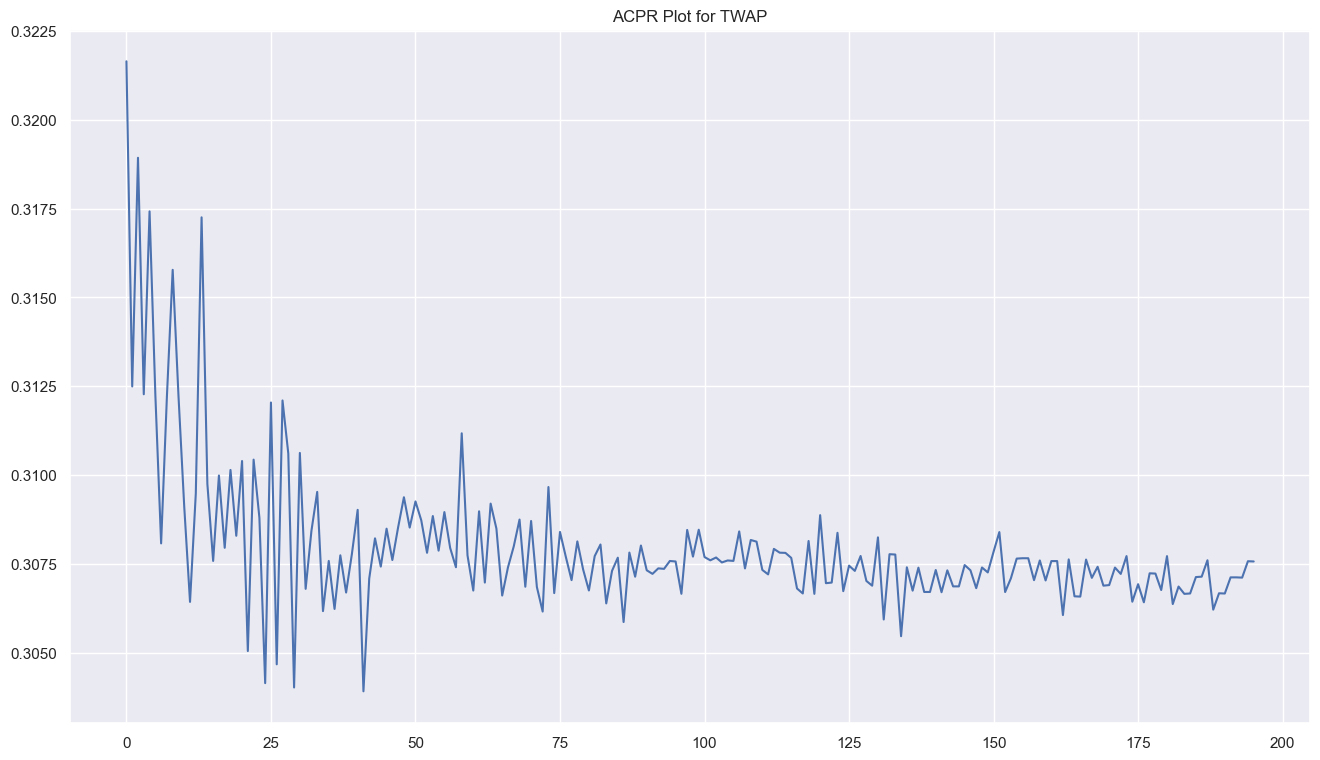

In [13]:
plt.title("ACPR Plot for TWAP")
sns.lineplot(ACPR_TWAP);

## AC

In [ ]:
plt.title("ACPR Plot for AC with ")
sns.lineplot(ACPR_AC);

## GLOBE

In [ ]:
plt.title("ACPR Plot for GLOBE with ")
sns.lineplot(ACPR_AC);

## Joint backtest

In [ ]:
file1 = 'optexec/ask1s.tsv'
file2 = 'optexec/bid1s.tsv'
T = 50
W = np.ones(shape = 10, dtype = int) * 500

W_max = 501 # GLOBE-only

lamb = 2*(0.01)
eta = 2*(0.001)
init_sigma = 0.021713089727230926

start = 2
stop = T
num = 2

skip = 0
rounds_for_est = 15

K = 100000.

params_GLOBE = {'lamb': lamb, 'eta': eta, 'init_sigma': init_sigma, 'W_max': W_max, 'K': K}
params_AC = {'lamb': lamb, 'eta': eta, 'init_sigma': init_sigma}
params_TWAP = {}

default_params = {'T': T, 'W': W, 'start': start, 'stop': stop, 'num': num,
                   'skip': skip, 'rounds_for_est': rounds_for_est, 'file1': file1, 'file2': file2,
                   'filename': 'optexec/TWAP_AC_GLOBE.pdf'}
params = {'TWAP': params_TWAP, 'AC': params_AC, 'GLOBE': params_GLOBE}

In [ ]:
misc.calculate_and_plot_all(**default_params, **params)